In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

In [2]:
f = open ( 'RIN_515' , 'r')
l = []
l = [line.split() for line in f]
freq = []
RIN = []
RIN_dB = []
for line in l[0:2005]:
    #print(line)
    freq.append(float(line[1]))
    RIN.append(float(line[2]))
    RIN_dB.append(float(line[3]))
#print(freq)
#print(RIN)
#print(RIN_dB)

2005
[[1230 1276 1378 1418 1462 1597]]


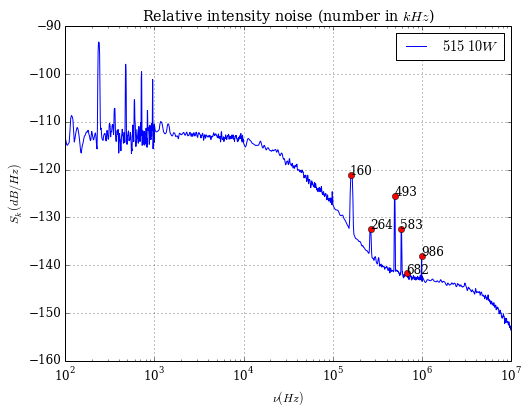

In [67]:
from scipy.signal import argrelextrema
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

RIN_dB = np.array(RIN_dB)
freq = np.array(freq)

print(len(freq))

maxInd = add(argrelextrema(np.array(RIN_dB[1200: 1700]), np.greater, order = 35), 1200)
print(np.array(maxInd))
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(freq, RIN_dB, markersize = 10, label = r'$515\ 10W$')
ax1.plot(freq[maxInd], RIN_dB[maxInd], 'ro')
for j, m in enumerate(np.array(maxInd)):
    for k, i in enumerate(m):
        ax1.annotate(int(freq[i] / 1000), (freq[i], RIN_dB[i]))
ax1.set_xlabel(r"$\nu (Hz)$")
ax1.set_ylabel(r"$S_k(dB / Hz)$")
ax1.set_xscale('log')
ax1.legend(loc = 1)
ax1.set_title('Relative intensity noise (number in $kHz$)')
ax1.grid(1)
#plt.savefig('RIN.svg')

# Several constants

In [4]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23
a_0 = 5.2917721067E-11


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

In [5]:
# Omega in units of 2 * pi * 10^15 Hz
# Wavelength in units of nm
def Wavelength(omega):
    return 2 * pi * c * 1E-6 / omega

def Omega(wavelength):
    return 2 * pi * c * 1E-6 / wavelength

print(Omega(679) / (2 * pi))

0.441520556701


# Analysis

Shot noise contribution: $S_{SN}(\nu) = 2 h \nu_L /P$, where $\nu_L$ is the laser frequency in Hz and $P$ is the power in Watts

$S_{SN}(\nu) = 7.71 \times 10 ^{-20} / Hz = -191 dB / Hz$

much smaller than the relative intensity noise

On the other hand, the one-side power spectrum is defined so that 

$\int_0^{\infty} d \nu S_k (\nu) = \langle \varepsilon^2(t) \rangle = \varepsilon_0^2$, where $\varepsilon_0$ is the rms noise, $\varepsilon_0 = 4.4 \times 10 ^{-4}$

In [6]:
# RMS intensity noise

s = 0
for index, _f in enumerate(freq):
    if index > 1:
        s = s + RIN[index] * (freq[index] - freq[index - 1])

epsilon0 = sqrt(s)
print(epsilon0)

0.000444257878566965


For a 1d trap at frequency $\nu_x$, average energy increases as (Gehm 1998)

$\langle \frac{d E_x}{dt} \rangle = \Gamma_x \langle E_x \rangle$

$\Gamma_x = \frac{1}{T_x} = \pi^2\nu_x^2 S_k(2\nu_x)$

where $T_x$ is the energy e-folding time in seconds

In [7]:
# Calculation of energy e-folding time
from numpy import divide, multiply

Tx_2f = []
_freq = []
for index, _f in enumerate(freq):
    Tx_2f.append(1 / (0.25 * pi ** 2 * _f ** 2 * RIN[index]))
    _freq.append(_f / 2)

[ 5000000.]
[[1231 1276 1378 1419 1597]]


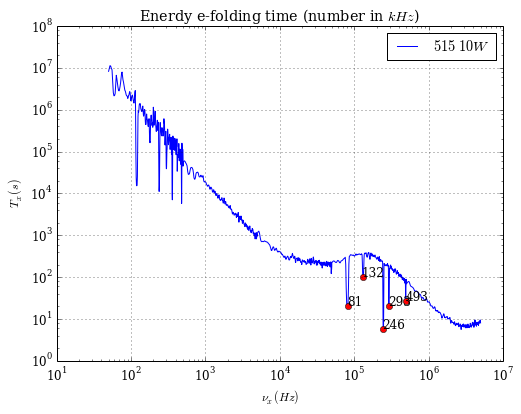

In [72]:
figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)
from numpy import add

Tx_2f = np.array(Tx_2f)
_freq = np.array(_freq)

print((_freq[2004: 2006]))

minInd = add(argrelextrema(np.array(Tx_2f[1200: 1600]), np.less, order = 30), 1200)
print(np.array(minInd))

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(_freq, Tx_2f, markersize = 10, label = r'$515\ 10W$')
ax1.plot(_freq[minInd], Tx_2f[minInd], 'ro')
for j, m in enumerate(np.array(minInd)):
    for k, i in enumerate(m):
        ax1.annotate(int(_freq[i] / 1000), (_freq[i], Tx_2f[i]))
ax1.set_xlabel(r"$\nu_x (Hz)$")
ax1.set_ylabel(r"$T_x(s)$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc = 1)
ax1.set_title(r'Enerdy e-folding time (number in $kHz$)')
ax1.grid(1)
#plt.savefig('Tx.svg')